In [1]:
import requests
import json
import html
import pandas as pd
import time
import numpy as np
import matplotlib.pyplot as plt
import unicodedata
import re

C:\Users\Karina\miniconda3\lib\site-packages\requests\__init__.py:109: RequestsDependencyWarning: urllib3 (2.2.2) or chardet (3.0.4)/charset_normalizer (2.0.4) doesn't match a supported version!
  warnings.warn(


In [2]:
# Function to remove special characters
def normalize_name(name):
    # Normalize to remove accents and special characters
    name = unicodedata.normalize('NFD', name)
    # Encode to ASCII and ignore errors, then decode back to string
    name = name.encode('ascii', 'ignore').decode('utf-8')
    return name

In [3]:

# # URL of the JSON file
# url = "https://itra.run/Races/RaceResults/TOR330.Tor.des.G%C3%A9ants%C2%AE/2023/80226"

# # Send a GET request to fetch the JSON data
# response = requests.get(url)
# response

In [4]:
years = [ '2024', '2023', 
         '2022', 
         '2022_HOTEL_ITALIA',  # bad weather at the end 
         '2022_RIFUGIO_FRASSATI',
         '2022_BOSSES',
         '2021', 
         '2019',
#          '2020', # cancelled due to covid
         '2018', '2017', '2016', 
         #'2015', # having issues with 2015
         '2014', '2013', '2012', '2011', '2010']

races = ['TOR330', 'TOR450']

#### Loading ITRA 

In [5]:

TORX_itra_df = {}
# races = ['TOR450']

for race in races:
    for year in years:
        try:

            file = f'{race} Data/ITRA/TXT/{race}_{year}.txt'
            df = pd.read_csv(file, delimiter='\t', 
                         dtype={'Time': 'string'})    

            # renaming columns so it is easier later to compare
            df = df.rename(columns={"Runner": "Name",
                                    "Gender": "Sex",
                                    "Nationality": "ITRA_Nationality",
                                   })

            # change the name to a title case
            df['Name'] = df['Name'].str.title()
            df['Name'] = df['Name'].apply(normalize_name)

            # Convert 'Time' to timedelta format
            df['Performance'] = pd.to_timedelta(df['Time'], errors='coerce')
            # Calculate total seconds and create 'Performance_Seconds' column
            df['Performance_Seconds'] = df['Performance'].dt.total_seconds()

            if year == '2022_HOTEL_ITALIA':
            # Create the 'Status' column
                df['Status'] =  'Finished at Hotel Italia'
                df['Year'] = '2022'    
            elif year == '2022_RIFUGIO_FRASSATI':
                df['Status'] = 'Finished at Rifugio Frassati'
                df['Year'] = '2022'
            elif year == '2022_BOSSES':
                df['Status'] =  'Finished at Bosses'
                df['Year'] = '2022'
            else:
                df['Status'] = np.where(df['Performance'].isna(), 'DNF', 'Finished')
                df['Year'] = f'{year}'

            df['Race'] = f'{race}'

    #             # Drop the intermediate columns if they're no longer needed
            df = df.drop(columns=['Time', '#'])

            df['Name'] = df['Name'].str.strip()
            df['Name'] = df['Name'].str.replace(',', '')
            df['Name'] = df['Name'].str.replace('\'', '')
            df['Name'] = df['Name'].str.replace('-', '')
            df['Name'] = df['Name'].str.replace(r"\s+", " ")

    #             print(race, year, '\n', df.head())

            # Store the DataFrame in the dictionary with a key like 'TOR330_2021'
            TORX_itra_df[f'{race}_{year}'] = df
            print('* ',f'{race}_{year} {df.shape}', '\n')
        except:
            
            if file == 'TOR330 Data/ITRA/TXT/TOR330_2022_HOTEL_ITALIA.txt':
                pass
            elif file == 'TOR450 Data/ITRA/TXT/TOR450_2022_RIFUGIO_FRASSATI.txt':
                pass
            elif file == 'TOR450 Data/ITRA/TXT/TOR330_2022_BOSSES.txt':
                pass
            
            else:
                print(f'issues with {race}_{year}')
                print(f'{file}')
                print('\n')
            


C:\Users\Karina\AppData\Local\Temp\ipykernel_1064\158164354.py:50: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Name'] = df['Name'].str.replace(r"\s+", " ")
C:\Users\Karina\AppData\Local\Temp\ipykernel_1064\158164354.py:50: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Name'] = df['Name'].str.replace(r"\s+", " ")
C:\Users\Karina\AppData\Local\Temp\ipykernel_1064\158164354.py:50: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Name'] = df['Name'].str.replace(r"\s+", " ")
C:\Users\Karina\AppData\Local\Temp\ipykernel_1064\158164354.py:50: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Name'] = df['Name'].str.replace(r"\s+", " ")
C:\Users\Karina\AppData\Local\Temp\ipykernel_1064\158164354.py:50: FutureWarning: The default value of regex will change from True to False in a future 

*  TOR330_2024 (1085, 9) 

*  TOR330_2023 (1093, 9) 

*  TOR330_2022 (408, 9) 

*  TOR330_2022_RIFUGIO_FRASSATI (101, 9) 

*  TOR330_2022_BOSSES (81, 9) 

*  TOR330_2021 (712, 9) 



C:\Users\Karina\AppData\Local\Temp\ipykernel_1064\158164354.py:50: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Name'] = df['Name'].str.replace(r"\s+", " ")
C:\Users\Karina\AppData\Local\Temp\ipykernel_1064\158164354.py:50: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Name'] = df['Name'].str.replace(r"\s+", " ")
C:\Users\Karina\AppData\Local\Temp\ipykernel_1064\158164354.py:50: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Name'] = df['Name'].str.replace(r"\s+", " ")
C:\Users\Karina\AppData\Local\Temp\ipykernel_1064\158164354.py:50: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Name'] = df['Name'].str.replace(r"\s+", " ")
C:\Users\Karina\AppData\Local\Temp\ipykernel_1064\158164354.py:50: FutureWarning: The default value of regex will change from True to False in a future 

*  TOR330_2019 (941, 9) 

*  TOR330_2018 (879, 9) 

*  TOR330_2017 (461, 9) 

*  TOR330_2016 (445, 9) 

*  TOR330_2014 (443, 9) 



C:\Users\Karina\AppData\Local\Temp\ipykernel_1064\158164354.py:50: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Name'] = df['Name'].str.replace(r"\s+", " ")
C:\Users\Karina\AppData\Local\Temp\ipykernel_1064\158164354.py:50: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Name'] = df['Name'].str.replace(r"\s+", " ")
C:\Users\Karina\AppData\Local\Temp\ipykernel_1064\158164354.py:50: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Name'] = df['Name'].str.replace(r"\s+", " ")
C:\Users\Karina\AppData\Local\Temp\ipykernel_1064\158164354.py:50: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Name'] = df['Name'].str.replace(r"\s+", " ")


*  TOR330_2013 (383, 9) 

*  TOR330_2012 (391, 9) 

*  TOR330_2011 (300, 9) 

*  TOR330_2010 (179, 9) 

*  TOR450_2024 (168, 9) 

*  TOR450_2023 (173, 9) 

*  TOR450_2022 (46, 9) 

*  TOR450_2022_HOTEL_ITALIA (11, 9) 

issues with TOR450_2022_BOSSES
TOR450 Data/ITRA/TXT/TOR450_2022_BOSSES.txt


*  TOR450_2021 (56, 9) 

*  TOR450_2019 (100, 9) 

issues with TOR450_2018
TOR450 Data/ITRA/TXT/TOR450_2018.txt


issues with TOR450_2017
TOR450 Data/ITRA/TXT/TOR450_2017.txt


issues with TOR450_2016
TOR450 Data/ITRA/TXT/TOR450_2016.txt


issues with TOR450_2014
TOR450 Data/ITRA/TXT/TOR450_2014.txt


issues with TOR450_2013
TOR450 Data/ITRA/TXT/TOR450_2013.txt


issues with TOR450_2012
TOR450 Data/ITRA/TXT/TOR450_2012.txt


issues with TOR450_2011
TOR450 Data/ITRA/TXT/TOR450_2011.txt


issues with TOR450_2010
TOR450 Data/ITRA/TXT/TOR450_2010.txt




C:\Users\Karina\AppData\Local\Temp\ipykernel_1064\158164354.py:50: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Name'] = df['Name'].str.replace(r"\s+", " ")
C:\Users\Karina\AppData\Local\Temp\ipykernel_1064\158164354.py:50: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Name'] = df['Name'].str.replace(r"\s+", " ")
C:\Users\Karina\AppData\Local\Temp\ipykernel_1064\158164354.py:50: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Name'] = df['Name'].str.replace(r"\s+", " ")
C:\Users\Karina\AppData\Local\Temp\ipykernel_1064\158164354.py:50: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Name'] = df['Name'].str.replace(r"\s+", " ")
C:\Users\Karina\AppData\Local\Temp\ipykernel_1064\158164354.py:50: FutureWarning: The default value of regex will change from True to False in a future 

In [6]:
for race in races:
    for year in years:
        try:
            tor_year = TORX_itra_df[f'{race}_{year}']

            # Count the occurrences of each status
            status_counts = tor_year['Status'].value_counts()

            print(race, year, '\n', status_counts, '\n', '*'*40)
        except:
            pass

TOR330 2024 
 DNF         552
Finished    533
Name: Status, dtype: int64 
 ****************************************
TOR330 2023 
 Finished    621
DNF         472
Name: Status, dtype: int64 
 ****************************************
TOR330 2022 
 Finished    408
Name: Status, dtype: int64 
 ****************************************
TOR330 2022_RIFUGIO_FRASSATI 
 Finished at Rifugio Frassati    101
Name: Status, dtype: int64 
 ****************************************
TOR330 2022_BOSSES 
 Finished at Bosses    81
Name: Status, dtype: int64 
 ****************************************
TOR330 2021 
 Finished    431
DNF         281
Name: Status, dtype: int64 
 ****************************************
TOR330 2019 
 Finished    563
DNF         378
Name: Status, dtype: int64 
 ****************************************
TOR330 2018 
 Finished    534
DNF         345
Name: Status, dtype: int64 
 ****************************************
TOR330 2017 
 Finished    461
Name: Status, dtype: int64 
 ********

In [7]:
# Append using pd.concat
TORX_itra_df = pd.concat(TORX_itra_df)
TORX_itra_df = TORX_itra_df.reset_index(drop = True)
TORX_itra_df.isna().sum()

Name                      0
Age                       0
Sex                      13
ITRA_Nationality          0
Performance            2301
Performance_Seconds    2301
Status                    0
Year                      0
Race                      0
dtype: int64

In [8]:
years_list = TORX_itra_df['Year'].unique()
race_list = TORX_itra_df['Race'].unique()

for race in races:
    for year in years_list:
        year_df = TORX_itra_df[(TORX_itra_df['Year'] == year) &
                              (TORX_itra_df['Race'] == race)]
        status_df = year_df['Status'].value_counts()
        print(race, year,'\n',status_df, '\n', '*'*40)
    

TOR330 2024 
 DNF         552
Finished    533
Name: Status, dtype: int64 
 ****************************************
TOR330 2023 
 Finished    621
DNF         472
Name: Status, dtype: int64 
 ****************************************
TOR330 2022 
 Finished                        408
Finished at Rifugio Frassati    101
Finished at Bosses               81
Name: Status, dtype: int64 
 ****************************************
TOR330 2021 
 Finished    431
DNF         281
Name: Status, dtype: int64 
 ****************************************
TOR330 2019 
 Finished    563
DNF         378
Name: Status, dtype: int64 
 ****************************************
TOR330 2018 
 Finished    534
DNF         345
Name: Status, dtype: int64 
 ****************************************
TOR330 2017 
 Finished    461
Name: Status, dtype: int64 
 ****************************************
TOR330 2016 
 Finished    445
Name: Status, dtype: int64 
 ****************************************
TOR330 2014 
 Finished    44

In [9]:
TORX_itra_df[TORX_itra_df['Sex'].isna()]

,Name,Age,Sex,ITRA_Nationality,Performance,Performance_Seconds,Status,Year,Race
643,Coluccio Pasquale,60,NaN,ITA,NaT,NaN,DNF,2024,TOR330
1223,Bryant Shane,45,NaN,USA,4 days 23:30:03,430203.0,Finished,2023,TOR330
1608,DAngelo Deva,33,NaN,ITA,6 days 01:56:32,525392.0,Finished,2023,TOR330
1760,Cailleau Marie Aline,56,NaN,FRA,NaT,NaN,DNF,2023,TOR330
2307,Carlier Julien,43,NaN,FRA,4 days 20:36:16,419776.0,Finished,2022,TOR330
2419,Barrot Loic,41,NaN,FRA,5 days 06:22:53,454973.0,Finished,2022,TOR330
2698,Coluccio Pasquale,58,NaN,ITA,5 days 13:42:05,481325.0,Finished at Bosses,2022,TOR330
3180,Polotti Diego,49,NaN,ITA,6 days 05:02:17,536537.0,Finished,2021,TOR330
3259,Coluccio Pasquale,57,NaN,ITA,NaT,NaN,DNF,2021,TOR330
4831,Martignoni Alessandro,40,NaN,ITA,6 days 00:29:36,520176.0,Finished,2018,TOR330


In [10]:
TORX_itra_df[TORX_itra_df['Name'] == 'D Haene Francois']

,Name,Age,Sex,ITRA_Nationality,Performance,Performance_Seconds,Status,Year,Race
0,D Haene Francois,39,M,FRA,2 days 21:08:32,248912.0,Finished,2024,TOR330


In [11]:
TORX_itra_df[TORX_itra_df['Name'] == 'Tierney Paul']

,Name,Age,Sex,ITRA_Nationality,Performance,Performance_Seconds,Status,Year,Race
2779,Tierney Paul,39,M,IRL,3 days 16:05:51,317151.0,Finished,2021,TOR330
4441,Tierney Paul,36,M,IRL,3 days 22:39:26,340766.0,Finished,2018,TOR330
5324,Tierney Paul,35,M,IRL,4 days 03:09:44,356984.0,Finished,2017,TOR330
8064,Tierney Paul,42,M,IRL,NaT,NaN,DNF,2024,TOR450
8076,Tierney Paul,41,M,IRL,5 days 15:22:00,487320.0,Finished,2023,TOR450
8246,Tierney Paul,40,M,IRL,5 days 16:23:20,491000.0,Finished,2022,TOR450


In [12]:
TORX_itra_df[TORX_itra_df['Name'].str.contains('Girolami Paolo')]

,Name,Age,Sex,ITRA_Nationality,Performance,Performance_Seconds,Status,Year,Race
1508,Girolami Paolo,51,M,ITA,5 days 21:59:50,511190.0,Finished,2023,TOR330
2723,Girolami Paolo,50,M,ITA,5 days 15:49:42,488982.0,Finished at Bosses,2022,TOR330
3818,Girolami Paolo,47,M,ITA,5 days 19:57:42,503862.0,Finished,2019,TOR330
4824,Girolami Paolo,46,M,ITA,5 days 23:54:43,518083.0,Finished,2018,TOR330
5654,Girolami Paolo,45,M,ITA,6 days 01:52:54,525174.0,Finished,2017,TOR330


### Reading in TORX dates extracted from DUV

In [13]:
file = f'Database Data/TORX_duv_dates_df.xlsx'
dates_duv_df = pd.read_excel(file)

# Drop the intermediate columns if they're no longer needed
dates_duv_df = dates_duv_df.drop(columns=['Day_of_Week Start_Date'])

for column in  dates_duv_df.columns:
    print(dates_duv_df[column].unique(), '\n')

['TOR130' 'TOR330' 'TOR450'] 

[2024 2023 2022 2019 2018 2017 2021 2013 2014 2016 2012 2011 2015 2010] 

['2024-09-10T21:00:00.000000000' '2023-09-12T21:00:00.000000000'
 '2022-09-13T21:00:00.000000000' '2019-09-10T21:00:00.000000000'
 '2018-09-11T21:00:00.000000000' '2017-09-13T21:00:00.000000000'
 '2021-09-14T21:00:00.000000000' '2023-09-10T10:00:00.000000000'
 '2021-09-12T10:00:00.000000000' '2017-09-10T10:00:00.000000000'
 '2024-09-08T10:00:00.000000000' '2013-09-08T10:00:00.000000000'
 '2022-09-11T10:00:00.000000000' '2014-09-07T10:00:00.000000000'
 '2019-09-08T10:00:00.000000000' '2018-09-09T10:00:00.000000000'
 '2016-09-11T10:00:00.000000000' '2012-09-09T10:00:00.000000000'
 '2011-09-11T10:00:00.000000000' '2015-09-13T10:00:00.000000000'
 '2010-09-12T10:00:00.000000000' '2023-09-08T20:00:00.000000000'
 '2024-09-06T20:00:00.000000000' '2022-09-09T20:00:00.000000000'
 '2019-09-06T20:00:00.000000000' '2021-09-10T20:00:00.000000000'] 



In [14]:
TORX_itra_df['Year'] = TORX_itra_df['Year'].astype('str')
dates_duv_df['Year'] = dates_duv_df['Year'].astype('str')

# Merging on two columns: 'Race' and 'Year'
merged_df = pd.merge(TORX_itra_df, dates_duv_df, on=['Race', 'Year'], how='inner')

print(merged_df)

                   Name Age Sex ITRA_Nationality     Performance  \
0      D Haene Francois  39   M              FRA 2 days 21:08:32   
1     Marmissolle Benat  43   M              FRA 3 days 01:10:18   
2        Perrier Martin  34   M              FRA 3 days 03:35:59   
3         Macchi Andrea  38   M              ITA 3 days 04:43:09   
4           Hall Damian  49   M              GBR 3 days 04:49:20   
...                 ...  ..  ..              ...             ...   
8451    Thiebat Orlando  65   M              ITA             NaT   
8452       Thierry Ador  48   M              FRA             NaT   
8453   Tribolo Philippe  44   M              FRA             NaT   
8454   Viglino Frederic  48   M              FRA             NaT   
8455  Zapata Munoz Juan  46   M              ESP             NaT   

      Performance_Seconds    Status  Year    Race          Start Date  
0                248912.0  Finished  2024  TOR330 2024-09-08 10:00:00  
1                263418.0  Finished  20

In [15]:
# TORX_itra_df
merged_df_no_DNF = merged_df[merged_df['Status'] != 'DNF'].reset_index(drop = True)
TORX_itra_no_DNF = merged_df_no_DNF[[
    'Name', 'ITRA_Nationality', 'Sex',  'Age', 
    'Start Date', 'Performance','Performance_Seconds','Status', 
    'Race', 'Year'
]]

In [16]:
merged_df_no_DNF['Status'].unique()

array(['Finished', 'Finished at Rifugio Frassati', 'Finished at Bosses',
       'Finished at Hotel Italia'], dtype=object)

### Extracting ITRA Demographics

In [17]:
# demographics_TORX_itra_df = TORX_itra_df[['Name', 'Sex', 'Nationality']]


# # Dropping all redundant rows
# demographics_TORX_itra_df.drop_duplicates( keep='first', inplace=True, ignore_index=False)#
# demographics_TORX_itra_df = demographics_TORX_itra_df.reset_index(drop = True)

# demographics_TORX_itra_df[demographics_TORX_itra_df['Name'] == 'Girolami Paolo']

# # demographics_TORX_itra_df.to_excel(f'Database Data/demographics_TORX_itra_df.xlsx' , index = False)

In [18]:
TORX_itra_no_DNF.columns

Index(['Name', 'ITRA_Nationality', 'Sex', 'Age', 'Start Date', 'Performance',
       'Performance_Seconds', 'Status', 'Race', 'Year'],
      dtype='object')

In [19]:
TORX_itra_no_DNF.isna().sum()

Name                   0
ITRA_Nationality       0
Sex                    9
Age                    0
Start Date             0
Performance            0
Performance_Seconds    0
Status                 0
Race                   0
Year                   0
dtype: int64

In [20]:
for column in TORX_itra_no_DNF.columns:
    uniquecolumns = TORX_itra_no_DNF[column].unique()
    print(column, '\n', uniquecolumns, '\n', '*'*20)

Name 
 ['D Haene Francois' 'Marmissolle Benat' 'Perrier Martin' ... 'Simao Diogo'
 'Richard Victor' 'Gonzalez Rodriguez Fernando'] 
 ********************
ITRA_Nationality 
 [' FRA' ' ITA' ' GBR' ' GER' ' ESP' ' USA' ' POL' ' NEP' ' SUI' ' NZL'
 ' DEN' ' CYP' ' BEL' ' CHN' ' TUR' ' SMR' ' NED' ' AUT' ' GRE' ' POR'
 ' SGP' ' MAR' ' NOR' ' SWE' ' CZE' ' CAN' ' JPN' ' BRA' ' IRL' ' FIN'
 ' UKR' ' BUL' ' MAS' ' MEX' ' LTU' ' GUA' ' KOR' ' CRC' ' ARG' ' RUS'
 ' ROU' ' SRB' ' AUS' ' HKG' ' INA' ' SVK' ' THA' ' SLO' ' EST' ' URU'
 ' KAZ' ' CRO' ' HUN' ' RSA' ' PHI' ' MRI' ' ISL' ' TPE' ' VIE' ' ALG'
 ' ECU' ' QAT' ' LAT' ' AND' ' CHI' ' CHE' ' MNE' ' PER' ' COL' ' IND'
 ' KEN' ' MDA' ' MON' ' LUX' ' ESA' ' ISR' ' LBN' ' BRU' ' PRT'] 
 ********************
Sex 
 ['M' 'F' nan] 
 ********************
Age 
 ['39' '43' '34' '38' '49' '29' '41' '46' '35' '61' '42' '45' '51' '37'
 '47' '44' '40' '36' '27' '33' '32' '54' '53' '57' '60' '26' '50' '52'
 '55' '28' '31' '30' '63' '58' '48' '56' '59' '66' 

In [21]:
TORX_itra_no_DNF.head()

,Name,ITRA_Nationality,Sex,Age,Start Date,Performance,Performance_Seconds,Status,Race,Year
0,D Haene Francois,FRA,M,39,2024-09-08 10:00:00,2 days 21:08:32,248912.0,Finished,TOR330,2024
1,Marmissolle Benat,FRA,M,43,2024-09-08 10:00:00,3 days 01:10:18,263418.0,Finished,TOR330,2024
2,Perrier Martin,FRA,M,34,2024-09-08 10:00:00,3 days 03:35:59,272159.0,Finished,TOR330,2024
3,Macchi Andrea,ITA,M,38,2024-09-08 10:00:00,3 days 04:43:09,276189.0,Finished,TOR330,2024
4,Hall Damian,GBR,M,49,2024-09-08 10:00:00,3 days 04:49:20,276560.0,Finished,TOR330,2024


### Examining Only TOR330 Finishers

In [23]:
TOR330_itra_finishers_df = TORX_itra_df[(TORX_itra_df['Status'] != 'DNF') &
                                   (TORX_itra_df['Race'] == 'TOR330')
                                  ]
TOR330_itra_finishers_df

,Name,Age,Sex,ITRA_Nationality,Performance,Performance_Seconds,Status,Year,Race
0,D Haene Francois,39,M,FRA,2 days 21:08:32,248912.0,Finished,2024,TOR330
1,Marmissolle Benat,43,M,FRA,3 days 01:10:18,263418.0,Finished,2024,TOR330
2,Perrier Martin,34,M,FRA,3 days 03:35:59,272159.0,Finished,2024,TOR330
3,Macchi Andrea,38,M,ITA,3 days 04:43:09,276189.0,Finished,2024,TOR330
4,Hall Damian,49,M,GBR,3 days 04:49:20,276560.0,Finished,2024,TOR330
...,...,...,...,...,...,...,...,...,...
7897,Marmier Natacha,55,F,FRA,6 days 04:37:16,535036.0,Finished,2010,TOR330
7898,Marmier Jean Claude,67,M,FRA,6 days 04:37:20,535040.0,Finished,2010,TOR330
7899,Slagel Craig,38,M,CAN,6 days 04:38:00,535080.0,Finished,2010,TOR330
7900,Dawirs Michel,52,M,BEL,6 days 04:43:34,535414.0,Finished,2010,TOR330


C:\Users\Karina\AppData\Local\Temp\ipykernel_1064\2837837908.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  TOR330_itra_finishers_df['Age'] = TOR330_itra_finishers_df['Age'].str.replace('-', '', regex=False)
C:\Users\Karina\AppData\Local\Temp\ipykernel_1064\2837837908.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  TOR330_itra_finishers_df['Age'] = pd.to_numeric(TOR330_itra_finishers_df['Age'], errors='coerce')


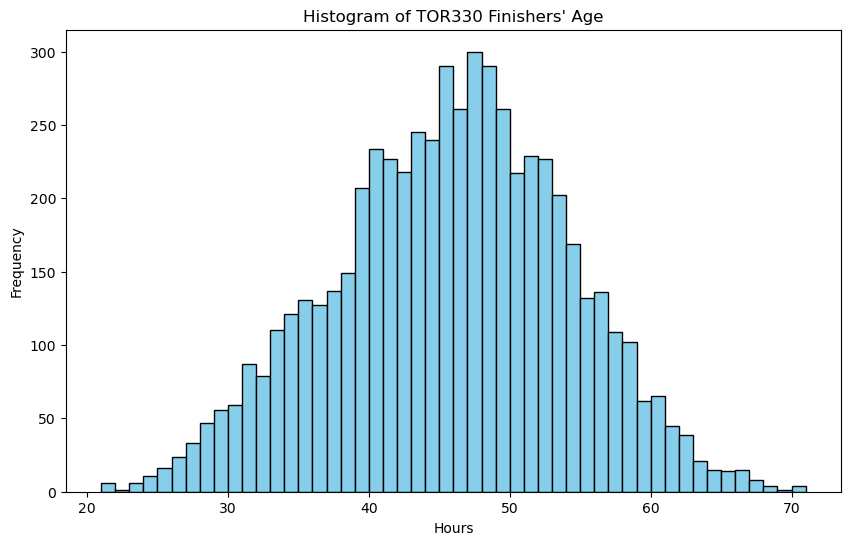

In [24]:
# Replace '-' with None, then convert to numeric
TOR330_itra_finishers_df['Age'] = TOR330_itra_finishers_df['Age'].str.replace('-', '', regex=False)
TOR330_itra_finishers_df['Age'] = pd.to_numeric(TOR330_itra_finishers_df['Age'], errors='coerce')


max_Age = TOR330_itra_finishers_df['Age'].max()
min_Age =  TOR330_itra_finishers_df['Age'].min()
age_bins = int(max_Age - min_Age)

# Plot the histogram
plt.figure(figsize=(10, 6))
plt.hist(TOR330_itra_finishers_df['Age'], bins=age_bins, color='skyblue', edgecolor='black')
plt.title('Histogram of TOR330 Finishers\' Age')
plt.xlabel('Hours')
plt.ylabel('Frequency')
plt.show()

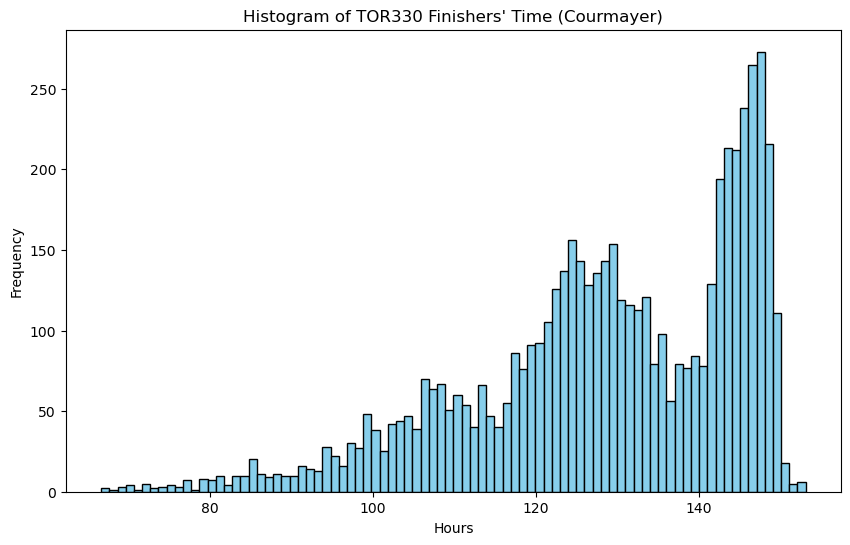

In [25]:
courmayer_finishers = TOR330_itra_finishers_df[~(TOR330_itra_finishers_df['Status'].str.contains(' at '))]

TOR330_itra_finishers_Performance = [t.total_seconds() / 3600 for t in courmayer_finishers['Performance']]

max_Performance = max(TOR330_itra_finishers_Performance)
min_Performance =  min(TOR330_itra_finishers_Performance)
Performance_bins = int(max_Performance- min_Performance)

# Plot the histogram
plt.figure(figsize=(10, 6))
plt.hist(TOR330_itra_finishers_Performance, bins=Performance_bins, color='skyblue', edgecolor='black')
plt.title('Histogram of TOR330 Finishers\' Time (Courmayer)')
plt.xlabel('Hours')
plt.ylabel('Frequency')
plt.show()

In [26]:
 TOR330_itra_finishers_df['Age'].describe()

count    5789.000000
mean       45.278977
std         8.355219
min        21.000000
25%        40.000000
50%        46.000000
75%        51.000000
max        71.000000
Name: Age, dtype: float64

In [27]:
 courmayer_finishers['Performance'].describe()

count                         5692
mean     5 days 08:44:33.346978215
std      0 days 16:39:50.689020266
min                2 days 18:39:16
25%                4 days 23:19:00
50%         5 days 10:26:31.500000
75%         5 days 23:40:46.750000
max                6 days 09:05:28
Name: Performance, dtype: object

In [28]:
# Save the result
# TORX_itra_df.to_excel(f'Database Data/TORX_itra_df.xlsx' , index = False)

# grabbing all finishers 
TORX_itra_no_DNF['Performance'] = TORX_itra_no_DNF['Performance'].astype('str')

TORX_itra_no_DNF.to_excel(f'Database Data/TORX_itra_no_DNF.xlsx' , index = False)

# TORX_itra_no_DNF.to_csv(f'Database Data/TORX_itra_no_DNF.csv' , index = False)

# TORX_itra_no_DNF.groupby(['Race','Year'])['Race','Year'].value_counts()